In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load, low_memory=False)

ride_df = pd.read_csv(ride_data_to_load, low_memory=False)


# Combine the data into a single dataset
Comb_city_ride_df = pd.merge(city_df,ride_df,on="city",how="inner") 


# Display the data table for preview
Comb_city_ride_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
Comb_city_ride_df = Comb_city_ride_df[["city","date","fare","ride_id","driver_count","type"]]


urban= Comb_city_ride_df.loc[Comb_city_ride_df['type'] == "Urban"]



urbangpby = urban.groupby(["city","type"])

urbangpby.head()


Rural= Comb_city_ride_df.loc[Comb_city_ride_df['type'] == "Rural"]
Ruralgpby = Rural.groupby(["city","type"])


Suburban= Comb_city_ride_df.loc[Comb_city_ride_df['type'] == "Suburban"]
Suburbangpby = Suburban.groupby(["city","type"])



# cityridegpby = Comb_city_ride_df.groupby(["type"])

# cityridegpby.head()








## Bubble Plot of Ride Sharing Data

In [118]:
# Obtain the x and y coordinates for each of the three city types
x_axis = []
y_axis = []

g1 = [(urbangpby["ride_id"].count() ,round(urbangpby["fare"].mean(),0))]
g2 = [(Ruralgpby["ride_id"].count() ,round(Ruralgpby["fare"].mean(),0))]
g3 = [(Suburbangpby["ride_id"].count() ,round(Suburbangpby["fare"].mean(),0))]

# x_axisu = urbangpby["ride_id"].count() 
# y_axisu = round(urbangpby["fare"].mean(),0)

# x_axisr = Ruralgpby["ride_id"].count() 
# y_axisr = round(Ruralgpby["fare"].mean(),0)

# x_axisu.head()

# cityridegpby.head()
# x_axis = cityridegpby["ride_id"].count() 
# y_axis = round(cityridegpby["fare"].mean(),0)
# y_axis


# # Build the scatter plots for each city types

# # sct = plt.scatter(x_axis, y_axis, c=color, s=area, linewidths=2, edgecolor='w')
# # sct.set_alpha(0.75)

 
data = (g1, g2, g3)
colors = ("orange", "yellow", "blue")
groups = ("Urban", "Suburban", "Rural")




# x_axis, y_axis = data
# ax.scatter(x, y, alpha=0.8, c=color, edgecolors='black', s=x, label=group)

# # Incorporate the other graph properties
# plt.scatter(x_axisu, y_axisu, marker="o", facecolors="orange", edgecolors="black",s=x_axisu,alpha=0.75)
# plt.scatter(x_axisu, y_axisu, marker="o", facecolors="yellow", edgecolors="black",s=x_axisr,alpha=0.75)


# # # Create a legend
# plt.title("Pyber Ride Sharing Data")
# plt.xlabel("Total Number of Rides (Per City)")
# plt.ylabel("Average Fare ($)")


# # Incorporate a text label regarding circle size

# Save Figure


[(city                  type 
  Amandaburgh           Urban    18
  Barajasview           Urban    22
  Carriemouth           Urban    27
  Christopherfurt       Urban    27
  Deanville             Urban    19
  East Kaylahaven       Urban    29
  Erikaland             Urban    12
  Grahamburgh           Urban    25
  Huntermouth           Urban    24
  Hurleymouth           Urban    28
  Jerryton              Urban    25
  Johnton               Urban    21
  Joneschester          Urban    25
  Justinberg            Urban    30
  Karenberg             Urban    17
  Karenside             Urban    28
  Lake Danielberg       Urban    26
  Lake Jonathanshire    Urban    24
  Lake Scottton         Urban    24
  Leahton               Urban    21
  Liumouth              Urban    33
  Loganberg             Urban    28
  Martinezhaven         Urban    24
  New Jacobville        Urban    18
  New Kimberlyborough   Urban    30
  New Paulton           Urban    19
  New Paulville         Urban    2

In [55]:









.show()

SyntaxError: invalid syntax (<ipython-input-55-30ab4006ac9e>, line 10)

## Total Fares by City Type

(-1.116743989203228, 1.197082437354063, -1.1125356615296045, 1.161150628009434)

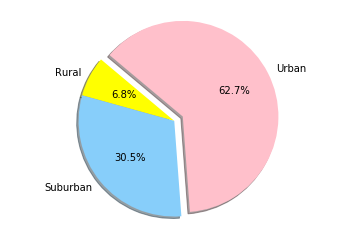

In [44]:
# Calculate Type Percents

Fare = []

cityridegpby = Comb_city_ride_df.groupby(["type"]).sum()

Fare = Comb_city_ride_df["fare"]

Faresum = Fare.sum()

Percentfare = cityridegpby/Faresum * 100

Percentfare["fare"]= Percentfare["fare"].map("{:.1f}".format)

Percentfare.reset_index()


#cityridegpby.head()



# Build Pie Chart

colors = ["yellow", "lightskyblue", "pink"]

labels = ["Rural","Suburban","Urban"]

explode = ( 0, 0,0.1 )

plt.pie(Percentfare["fare"], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.axis("equal")

In [45]:
# Show Figure
plt.show()

## Total Rides by City Type

In [51]:
# Calculate Ride Percents


ride = []

cityridegpbyr = Comb_city_ride_df.groupby(["ride_id"]).count()

ride = Comb_city_ride_df["ride_id"]

ridecount = ride.count()

cityridegpbyr.head()



# Percentride = cityridegpbyr/ridesum * 100
# Percentride
# Percentride["ride_id"]= Percentride["ride_id"].map("{:.1f}".format)

# Percentfare.reset_index()


#cityridegpby.head()



# Build Pie Chart

# colors = ["yellow", "lightskyblue", "pink"]

# labels = ["Rural","Suburban","Urban"]

# explode = ( 0, 0,0.1 )

# plt.pie(Percentride["ride_id"], explode=explode, labels=labels, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=140)

# # Save Figure
# plt.axis("equal")

# Build Pie Chart

# Save Figure


,city,date,fare,driver_count,type
ride_id,,,,,
321833677,1,1,1,1,1
1506044208,1,1,1,1,1
14588103145,1,1,1,1,1
16507766547,1,1,1,1,1
18586563147,1,1,1,1,1


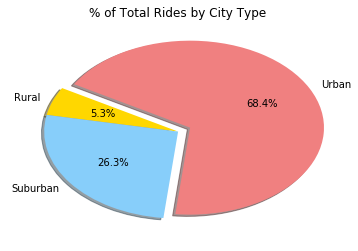

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


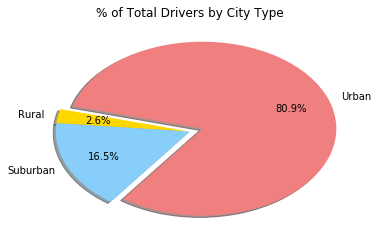

In [6]:
# Show Figure
plt.show()